In [161]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [162]:
airline = pd.read_csv('./customer_airways_data.csv', encoding='latin1')

In [163]:
reviews = pd.read_csv('./cleaned-reviews.csv', encoding='latin1')

In [164]:
# Limpiamos archivos
airline.drop_duplicates(inplace=True)
airline = airline.loc[airline.booking_origin != "(not set)",:]

reviews['date'] = pd.to_datetime(reviews['date'], errors='coerce')

#### Creo una funcion para mapear los meses a estaciones del año.
##### no uso dt.season porque no reconoce la funciòn

In [165]:
def get_season(date):
  month = date.month
  seasons = {
      1: "Verano",
      2: "Verano",
      3: "Otoño",
      4: "Otoño",
      5: "Otoño",
      6: "Invierno",
      7: "Invierno",
      8: "Invierno",
      9: "Primavera",
      10: "Primavera",
      11: "Primavera",
      12: "Verano"
  }
  return seasons.get(month)

#### Agregamos una columna para representar la estacion del año

In [166]:
reviews['season'] = reviews['date'].map(get_season)
reviews

,Unnamed: 0,reviews,rates,date,country,verified,comments,season
0,0,â Trip Verified | Excellent service both on ...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...,Verano
1,1,â Trip Verified | Good lounge at Cape Town....,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...,Verano
2,2,â Trip Verified | A really excellent journe...,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...,Verano
3,3,â Trip Verified | This flight was one of th...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...,Verano
4,4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...,Verano
...,...,...,...,...,...,...,...,...
3406,3413,Flew British Airways from Sydney to Venice on ...,10,2014-05-20,Australia,False,flew british airway sydney venice nd april ret...,Otoño
3407,3414,Recently for our honeymoon we took advantage o...,1,2014-05-19,United Kingdom,False,recently honeymoon took advantage ba promo fly...,Otoño
3408,3415,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,4,2014-05-18,United Kingdom,False,lgw antigua april antigua lgw may boeing start...,Otoño
3409,3416,LHR-JTR-LHR. A tale of opposites for BA's new ...,2,2014-05-18,United Kingdom,False,lhr jtr lhr tale opposite ba new route santori...,Otoño


#### Agrupamos por estacion del año

In [167]:
reviews = reviews.groupby(['season','country']).size()
reviews = reviews.unstack(level=0)
reviews


season,Invierno,Otoño,Primavera,Verano
country,,,,
Argentina,NaN,2.0,3.0,1.0
Australia,45.0,28.0,51.0,23.0
Austria,NaN,2.0,5.0,3.0
Bahrain,NaN,1.0,NaN,NaN
Barbados,1.0,NaN,NaN,NaN
...,...,...,...,...
Ukraine,1.0,NaN,NaN,NaN
United Arab Emirates,5.0,4.0,8.0,3.0
United Kingdom,547.0,520.0,598.0,500.0


#### Dado que tenemos algunas columnas sin datos, las eliminamos porque no tenemos informacion relevante

In [168]:
reviews = reviews[~reviews.isnull().any(axis=1)]

In [169]:
reviews

season,Invierno,Otoño,Primavera,Verano
country,,,,
Australia,45.0,28.0,51.0,23.0
Belgium,3.0,11.0,4.0,3.0
Brazil,1.0,1.0,1.0,1.0
Canada,31.0,19.0,27.0,27.0
Denmark,3.0,2.0,3.0,3.0
France,1.0,7.0,9.0,9.0
Germany,15.0,14.0,17.0,14.0
Hong Kong,8.0,3.0,2.0,1.0
India,2.0,6.0,3.0,6.0


#### Ahora filtramos los paises de airline



In [170]:
airline = airline.merge(reviews, left_on='booking_origin', right_on='country', how='inner')
airline

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Invierno,Otoño,Primavera,Verano
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,3.0,2.0,5.0,1.0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,3.0,2.0,5.0,1.0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,2.0,6.0,3.0,6.0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,3.0,2.0,5.0,1.0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,2.0,6.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31429,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,45.0,28.0,51.0,23.0
31430,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,45.0,28.0,51.0,23.0
31431,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,45.0,28.0,51.0,23.0
31432,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,45.0,28.0,51.0,23.0


#### Calculamos el porcentaje correspondiente a las reservas por pais

In [171]:
airline_percentage = airline.groupby('booking_origin')['booking_complete'].mean()*100
airline_percentage

booking_origin
Australia                5.059070
Belgium                 14.285714
Brazil                   0.000000
Canada                   3.508772
Denmark                 42.857143
France                  22.413793
Germany                 20.370370
Hong Kong               24.489796
India                   10.174881
Ireland                  0.000000
Italy                   18.965517
Kuwait                  22.222222
Malaysia                34.500354
Mexico                  11.111111
Netherlands              4.444444
New Zealand              5.000000
Singapore               28.529981
South Africa             0.000000
Spain                    3.703704
Sweden                  41.666667
Switzerland             16.666667
Thailand                23.281485
United Arab Emirates     7.142857
United Kingdom          12.138728
United States           18.322296
Name: booking_complete, dtype: float64

In [172]:
for pais, porcentaje in airline_percentage.items():
    reviews.loc[pais] = reviews.loc[pais] * porcentaje / 100
  
reviews

season,Invierno,Otoño,Primavera,Verano
country,,,,
Australia,2.276581,1.416539,2.580125,1.163586
Belgium,0.428571,1.571429,0.571429,0.428571
Brazil,0.000000,0.000000,0.000000,0.000000
Canada,1.087719,0.666667,0.947368,0.947368
Denmark,1.285714,0.857143,1.285714,1.285714
France,0.224138,1.568966,2.017241,2.017241
Germany,3.055556,2.851852,3.462963,2.851852
Hong Kong,1.959184,0.734694,0.489796,0.244898
India,0.203498,0.610493,0.305246,0.610493


#### Uniformizamos porque hay valores muy distantes (el grafico no se va a ver bien)

In [173]:
reviews = np.log1p(reviews)
reviews

season,Invierno,Otoño,Primavera,Verano
country,,,,
Australia,1.186801,0.882337,1.275398,0.771767
Belgium,0.356675,0.944462,0.451985,0.356675
Brazil,0.000000,0.000000,0.000000,0.000000
Canada,0.736072,0.510826,0.666479,0.666479
Denmark,0.826679,0.619039,0.826679,0.826679
France,0.202237,0.943503,1.104343,1.104343
Germany,1.400088,1.348554,1.495813,1.348554
Hong Kong,1.084913,0.550831,0.398639,0.219054
India,0.185232,0.476540,0.266392,0.476540


Text(0.5, 1.0, 'Muestreo de reservas  completas (%) por estacion del año')

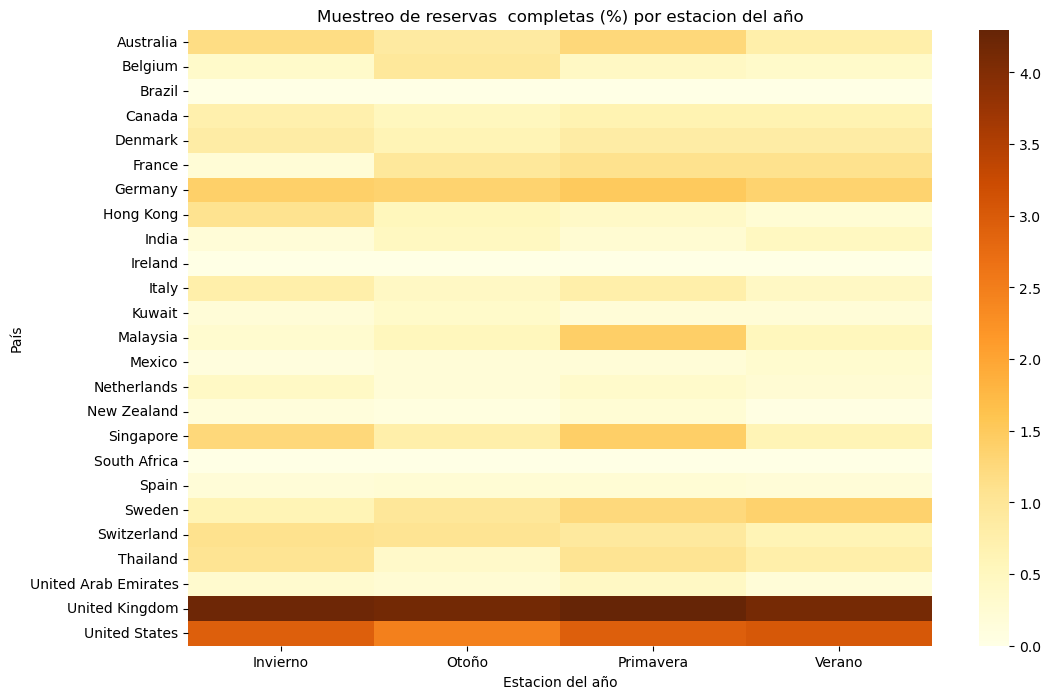

In [174]:
plt.figure(figsize=(12, 8))
sns.heatmap(reviews, cmap="YlOrBr")


plt.xlabel("Estacion del año")
plt.ylabel("País")
plt.title("Muestreo de reservas  completas (%) por estacion del año")


In [175]:
airline_channel = airline.groupby("booking_origin")["sales_channel"].value_counts()
airline_channel = airline_channel.to_frame().reset_index()

airline_channel = airline_channel.merge(reviews, left_on='booking_origin', right_on='country', how='inner')
airline_channel.rename(columns={"count":"quantity"},inplace=True)
airline_channel = airline_channel[["booking_origin","sales_channel","quantity"]]
airline_channel

,booking_origin,sales_channel,quantity
0,Australia,Internet,16247
1,Australia,Mobile,1444
2,Belgium,Internet,7
3,Brazil,Internet,9
4,Canada,Internet,55
5,Canada,Mobile,2
6,Denmark,Internet,7
7,France,Internet,52
8,France,Mobile,6
9,Germany,Internet,51


#### Para representar, filtro para los paises que tienen ambos canales de venta

In [180]:
df = airline_channel.groupby("booking_origin")
filtered_df = df.filter(lambda x: x["sales_channel"].nunique() == 2)
filtered_df


,booking_origin,sales_channel,quantity
0,Australia,Internet,16247
1,Australia,Mobile,1444
4,Canada,Internet,55
5,Canada,Mobile,2
7,France,Internet,52
8,France,Mobile,6
9,Germany,Internet,51
10,Germany,Mobile,3
11,Hong Kong,Internet,270
12,Hong Kong,Mobile,24


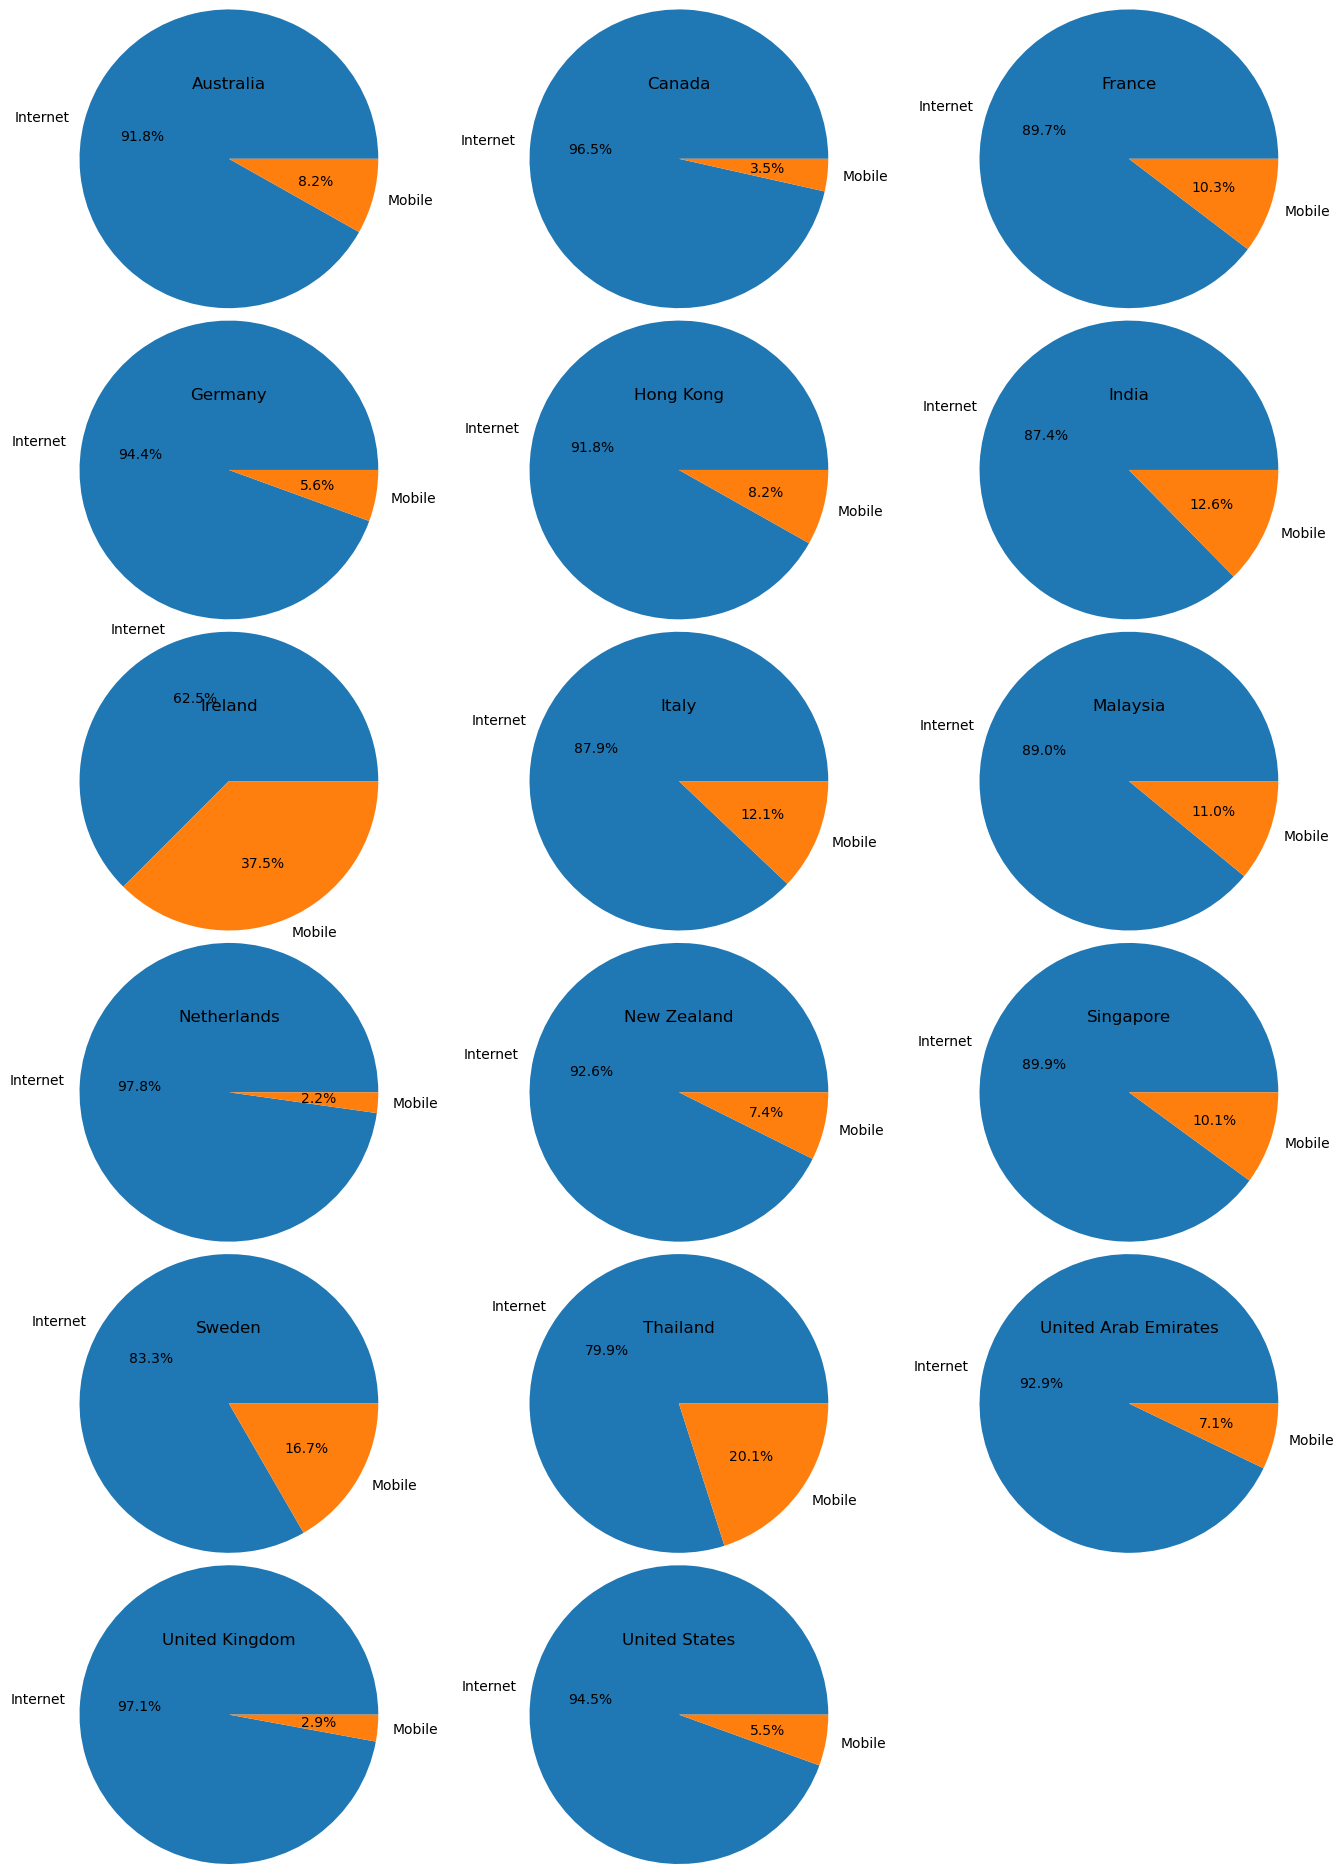

In [201]:
countries = list(filtered_df.booking_origin.unique())

plt.figure(figsize=(15, 15))

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=2, wspace=0, hspace=1.5)

for i, country in enumerate(countries):
  dataFrame = filtered_df.loc[filtered_df.booking_origin == country,:]
  ax = plt.subplot(10, 3, i + 1)
  ax.pie(x=dataFrame.quantity, labels=dataFrame.sales_channel, autopct="%1.1f%%",radius=3)
  ax.set_title(country)  

